In [42]:
# it is used to reduce complexity of mathematical operations, improving numerical stability, and gaining insight into the structure of matrices.

# eigenvalues decomposition
'''
focuses on square matrices and breaks them into their eigenvalues and eigenvectors.
Eigenvectors - These are special vectors / matrices whose direction remains unchanged when matrix is applied to it(it can be stretched or compresed)
This happens because an eigenvector is a vector that, when multiplied by a matrix, gets transformed by a scalar multiple, rather than
changing direction or getting rotated. The scalar multiple is the eigenvalue.

The eigenvalue associated with an eigenvector tells us how much the eigenvector is stretched or compressed.


EXAMPLE -
Google page rank algorithm
'''

'\nfocuses on square matrices and breaks them into their eigenvalues and eigenvectors.\nEigenvectors - These are special vectors / matrices whose direction remains unchanged when matrix is applied to it(it can be stretched or compresed)\nThis happens because an eigenvector is a vector that, when multiplied by a matrix, gets transformed by a scalar multiple, rather than \nchanging direction or getting rotated. The scalar multiple is the eigenvalue.\n\nThe eigenvalue associated with an eigenvector tells us how much the eigenvector is stretched or compressed.\n\n\nEXAMPLE - \nGoogle page rank algorithm\n'

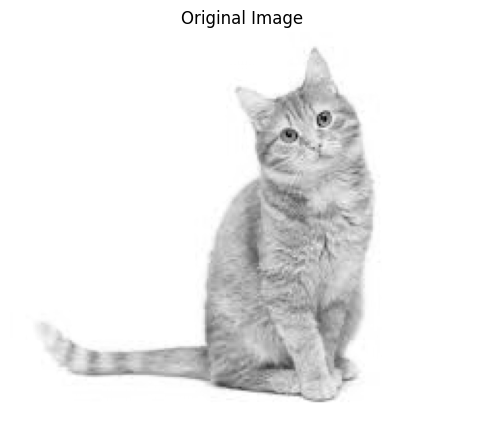

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert to grayscale
img = Image.open('/content/cat_photo.jpeg').convert('L')  # 'L' mode is for grayscale
img_matrix = np.array(img)

# Display the original image
plt.figure(figsize=(6,6))
plt.imshow(img_matrix, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [44]:
# check wether matrix is square or not
rows, cols = img_matrix.shape
rows, cols

(209, 241)

In [45]:
# make them of same dimension
min_dim = min(rows, cols)
square_img_matrix = img_matrix[:min_dim, :min_dim]

square_img_matrix.shape

(209, 209)

In [46]:
# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(square_img_matrix)

# Display the results
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [ 4.90516244e+04+0.00000000e+00j -2.16155541e+03+0.00000000e+00j
 -1.08192679e+03+0.00000000e+00j  8.24410207e+02+2.56752482e+02j
  8.24410207e+02-2.56752482e+02j  3.15925712e+02+4.46477600e+02j
  3.15925712e+02-4.46477600e+02j -5.32606719e+02+0.00000000e+00j
  1.18318354e+02+2.97632043e+02j  1.18318354e+02-2.97632043e+02j
  2.95034878e+02+0.00000000e+00j -2.17842663e+02+0.00000000e+00j
 -1.22015530e+02+1.85844475e+02j -1.22015530e+02-1.85844475e+02j
 -6.33898356e+01+1.93319707e+02j -6.33898356e+01-1.93319707e+02j
 -1.39187232e+02+1.31546046e+02j -1.39187232e+02-1.31546046e+02j
  7.24906134e+01+1.85980792e+02j  7.24906134e+01-1.85980792e+02j
  1.86850152e+02+0.00000000e+00j  1.54312238e+02+6.18785147e+01j
  1.54312238e+02-6.18785147e+01j -2.72114404e+01+1.48153455e+02j
 -2.72114404e+01-1.48153455e+02j  1.32829835e+02+0.00000000e+00j
  8.10132121e+01+1.05521941e+02j  8.10132121e+01-1.05521941e+02j
 -1.11487938e+02+2.45950296e+01j -1.11487938e+02-2.45950296e+01j
  2.4322079

In [47]:
# check if imaginary/complex eigenvalues are generated
if np.iscomplex(eigenvalues).any():
    print("Some eigenvalues are complex.")
else:
    print("All eigenvalues are real.")

Some eigenvalues are complex.


In [48]:
'''
Reason for complex matrix
If a matrix is asymmetric (i.e.,
𝐴 ≠ 𝐴𝑇
'''

'\nReason for complex matrix \nIf a matrix is asymmetric (i.e., \n𝐴 ≠ 𝐴𝑇\n'

In [49]:
# reconstruction back to original using eigenvalues and eigenvectors
'''
The reconstruction formula is:

𝐴 = 𝑉 Λ 𝑉−1

Where:

A is the original matrix (in this case, the image matrix).
V is the matrix of eigenvectors
Λ is the diagonal matrix of eigenvalues.
𝑉−1 is the inverse of the matrix of eigenvectors.

'''

'\nThe reconstruction formula is:\n\n𝐴 = 𝑉 Λ 𝑉−1\n \nWhere:\n\nA is the original matrix (in this case, the image matrix).\nV is the matrix of eigenvectors\nΛ is the diagonal matrix of eigenvalues.\n𝑉−1 is the inverse of the matrix of eigenvectors.\n\n'

TypeError: Image data of dtype complex128 cannot be converted to float

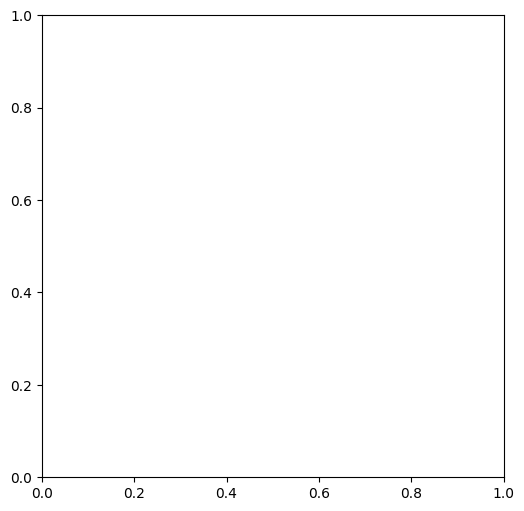

In [50]:
# constructing them back to original
lambda_matrix = np.diag(eigenvalues)

# Reconstruct the original matrix using the formula A = V * Lambda * V^(-1)
reconstructed_matrix = eigenvectors @ lambda_matrix @ np.linalg.inv(eigenvectors)

# Ensure the matrix values are within valid pixel range (0 to 255)
reconstructed_matrix = np.clip(reconstructed_matrix, 0, 255)

# Display the reconstructed image
plt.figure(figsize=(6,6))
plt.imshow(reconstructed_matrix, cmap='gray')
plt.title('Reconstructed Image Using Eigenvectors and Eigenvalues')
plt.axis('off')
plt.show()

In [51]:
# remove complex eigen values
'''
removing complex components might result in a loss of important information,
particularly if those complex parts represent actual properties of your matrix.
'''

# Convert eigenvalues and eigenvectors to their real part only
real_eigenvalues = np.real(eigenvalues)
real_eigenvectors = np.real(eigenvectors)

# Now, proceed with these real parts for further calculations
print("Real Eigenvalues:\n", real_eigenvalues)
print("Real Eigenvectors:\n", real_eigenvectors)

Real Eigenvalues:
 [ 4.90516244e+04 -2.16155541e+03 -1.08192679e+03  8.24410207e+02
  8.24410207e+02  3.15925712e+02  3.15925712e+02 -5.32606719e+02
  1.18318354e+02  1.18318354e+02  2.95034878e+02 -2.17842663e+02
 -1.22015530e+02 -1.22015530e+02 -6.33898356e+01 -6.33898356e+01
 -1.39187232e+02 -1.39187232e+02  7.24906134e+01  7.24906134e+01
  1.86850152e+02  1.54312238e+02  1.54312238e+02 -2.72114404e+01
 -2.72114404e+01  1.32829835e+02  8.10132121e+01  8.10132121e+01
 -1.11487938e+02 -1.11487938e+02  2.43220790e+01  2.43220790e+01
  5.01843924e+01  5.01843924e+01  1.00089074e+02  4.64357203e+01
  4.64357203e+01 -3.42945216e+01 -3.42945216e+01 -7.63406758e+01
 -7.63406758e+01 -9.77028310e+01  7.61898318e+01 -1.11793478e+01
 -1.11793478e+01 -8.06541553e+01 -8.06541553e+01 -5.09477009e+01
 -5.09477009e+01 -4.60432111e+01 -4.60432111e+01  1.97000199e+01
  1.97000199e+01  5.07632301e+01  5.07632301e+01  5.66929333e+01
  5.66929333e+01  5.88385268e+01 -6.09414288e+00 -6.09414288e+00
  3.19

In [52]:
if np.iscomplex(real_eigenvalues).any():
    print("Some eigenvalues are complex.")
else:
    print("All eigenvalues are real.")

All eigenvalues are real.


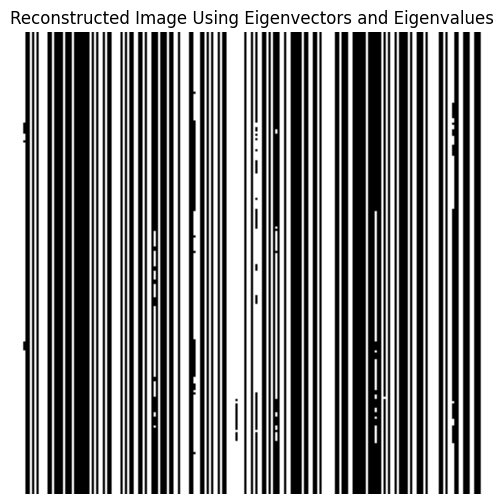

In [53]:
# Create a diagonal matrix from the eigenvalues
lambda_matrix = np.diag(real_eigenvalues)

# Reconstruct the original matrix using the formula A = V * Lambda * V^(-1)
reconstructed_matrix = real_eigenvectors @ lambda_matrix @ np.linalg.inv(real_eigenvectors)

# Ensure the matrix values are within valid pixel range (0 to 255)
reconstructed_matrix = np.clip(reconstructed_matrix, 0, 255)

# Display the reconstructed image
plt.figure(figsize=(6,6))
plt.imshow(reconstructed_matrix, cmap='gray')
plt.title('Reconstructed Image Using Eigenvectors and Eigenvalues')
plt.axis('off')
plt.show()

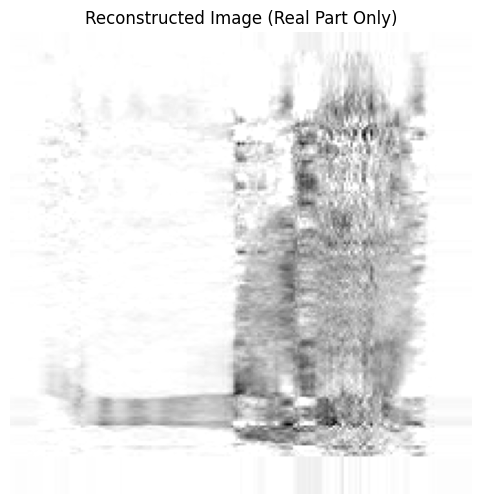

In [54]:
# taking original eigen values and eigen vector and taking real reconstructed matrix

# Reconstruct the image using eigenvectors and eigenvalues
reconstructed_matrix = eigenvectors @ lambda_matrix @ np.linalg.inv(eigenvectors)

# Use np.real() to discard any imaginary part of the complex numbers
reconstructed_matrix = np.real(reconstructed_matrix)

# Ensure the values are within valid pixel range (0 to 255)
reconstructed_matrix = np.clip(reconstructed_matrix, 0, 255)

# Display the reconstructed image
plt.figure(figsize=(6,6))
plt.imshow(reconstructed_matrix, cmap='gray')
plt.title('Reconstructed Image (Real Part Only)')
plt.axis('off')
plt.show()

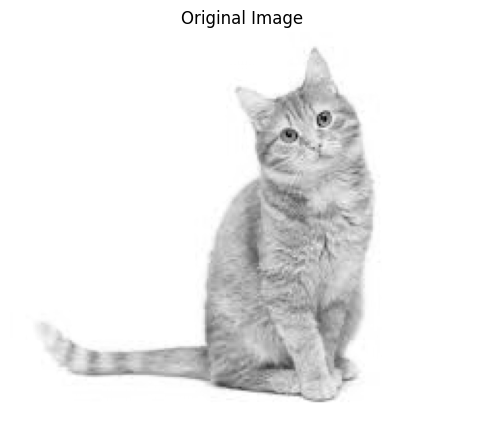

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert to grayscale
img = Image.open('/content/cat_photo.jpeg').convert('L')  # 'L' mode is for grayscale
img_matrix = np.array(img)

# Display the original image
plt.figure(figsize=(6,6))
plt.imshow(img_matrix, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [61]:
# padding to max length

rows, cols = img_matrix.shape

# padding instead of cropping
max_dim = max(rows, cols)

# Pad the image with zeros (or any value you prefer) to make it square
padded_img_matrix = np.pad(img_matrix,
                           ((0, max_dim - rows), (0, max_dim - cols)),
                           mode='constant', constant_values=0)

eigenvalues, eigenvectors = np.linalg.eig(padded_img_matrix)

# Print the eigenvalues and eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [ 4.90516244e+04+0.00000000e+00j -2.16155541e+03+0.00000000e+00j
 -1.08192679e+03+0.00000000e+00j  8.24410207e+02+2.56752482e+02j
  8.24410207e+02-2.56752482e+02j  3.15925712e+02+4.46477600e+02j
  3.15925712e+02-4.46477600e+02j -5.32606719e+02+0.00000000e+00j
  1.18318354e+02+2.97632043e+02j  1.18318354e+02-2.97632043e+02j
  2.95034878e+02+0.00000000e+00j -2.17842663e+02+0.00000000e+00j
 -1.22015530e+02+1.85844475e+02j -1.22015530e+02-1.85844475e+02j
 -6.33898356e+01+1.93319707e+02j -6.33898356e+01-1.93319707e+02j
 -1.39187232e+02+1.31546046e+02j -1.39187232e+02-1.31546046e+02j
  7.24906134e+01+1.85980792e+02j  7.24906134e+01-1.85980792e+02j
  1.86850152e+02+0.00000000e+00j  1.54312238e+02+6.18785147e+01j
  1.54312238e+02-6.18785147e+01j -2.72114404e+01+1.48153455e+02j
 -2.72114404e+01-1.48153455e+02j  1.32829835e+02+0.00000000e+00j
  8.10132121e+01+1.05521941e+02j  8.10132121e+01-1.05521941e+02j
 -1.11487938e+02+2.45950296e+01j -1.11487938e+02-2.45950296e+01j
  2.4322079

TypeError: Image data of dtype complex128 cannot be converted to float

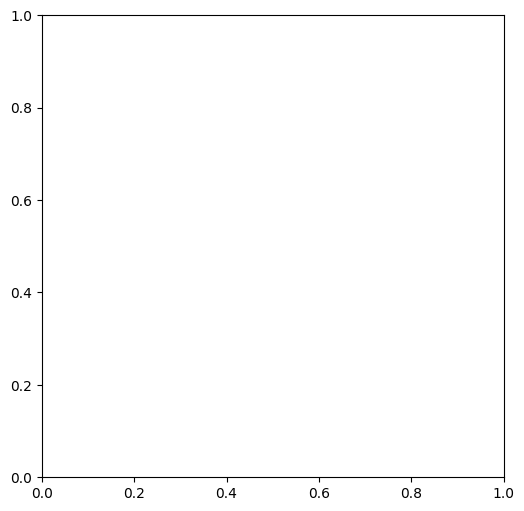

In [62]:
# constructing them back to original
lambda_matrix = np.diag(eigenvalues)

# Reconstruct the original matrix using the formula A = V * Lambda * V^(-1)
reconstructed_matrix = eigenvectors @ lambda_matrix @ np.linalg.inv(eigenvectors)

# Ensure the matrix values are within valid pixel range (0 to 255)
reconstructed_matrix = np.clip(reconstructed_matrix, 0, 255)

# Display the reconstructed image
plt.figure(figsize=(6,6))
plt.imshow(reconstructed_matrix, cmap='gray')
plt.title('Reconstructed Image Using Eigenvectors and Eigenvalues')
plt.axis('off')
plt.show()

In [63]:
# Convert eigenvalues and eigenvectors to their real part only
real_eigenvalues = np.real(eigenvalues)
real_eigenvectors = np.real(eigenvectors)

# Now, proceed with these real parts for further calculations
print("Real Eigenvalues:\n", real_eigenvalues)
print("Real Eigenvectors:\n", real_eigenvectors)

Real Eigenvalues:
 [ 4.90516244e+04 -2.16155541e+03 -1.08192679e+03  8.24410207e+02
  8.24410207e+02  3.15925712e+02  3.15925712e+02 -5.32606719e+02
  1.18318354e+02  1.18318354e+02  2.95034878e+02 -2.17842663e+02
 -1.22015530e+02 -1.22015530e+02 -6.33898356e+01 -6.33898356e+01
 -1.39187232e+02 -1.39187232e+02  7.24906134e+01  7.24906134e+01
  1.86850152e+02  1.54312238e+02  1.54312238e+02 -2.72114404e+01
 -2.72114404e+01  1.32829835e+02  8.10132121e+01  8.10132121e+01
 -1.11487938e+02 -1.11487938e+02  2.43220790e+01  2.43220790e+01
  5.01843924e+01  5.01843924e+01  1.00089074e+02  4.64357203e+01
  4.64357203e+01 -3.42945216e+01 -3.42945216e+01 -7.63406758e+01
 -7.63406758e+01 -9.77028310e+01  7.61898318e+01 -1.11793478e+01
 -1.11793478e+01 -8.06541553e+01 -8.06541553e+01 -5.09477009e+01
 -5.09477009e+01 -4.60432111e+01 -4.60432111e+01  1.97000199e+01
  1.97000199e+01  5.07632301e+01  5.07632301e+01  5.66929333e+01
  5.66929333e+01  5.88385268e+01 -6.09414288e+00 -6.09414288e+00
  3.19

In [64]:
# Create a diagonal matrix from the eigenvalues
lambda_matrix = np.diag(real_eigenvalues)

# Reconstruct the original matrix using the formula A = V * Lambda * V^(-1)
reconstructed_matrix = real_eigenvectors @ lambda_matrix @ np.linalg.inv(real_eigenvectors)

# Ensure the matrix values are within valid pixel range (0 to 255)
reconstructed_matrix = np.clip(reconstructed_matrix, 0, 255)

# Display the reconstructed image
plt.figure(figsize=(6,6))
plt.imshow(reconstructed_matrix, cmap='gray')
plt.title('Reconstructed Image Using Eigenvectors and Eigenvalues')
plt.axis('off')
plt.show()

LinAlgError: Singular matrix

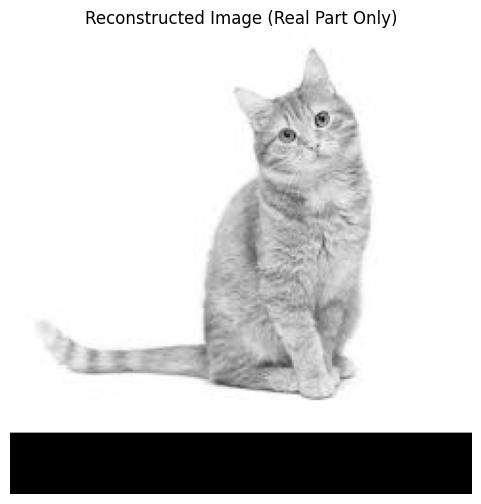

In [65]:
# taking original eigen values and eigen vector and taking real reconstructed matrix

lambda_matrix = np.diag(eigenvalues)

# Reconstruct the image using eigenvectors and eigenvalues
reconstructed_matrix = eigenvectors @ lambda_matrix @ np.linalg.inv(eigenvectors)

# Use np.real() to discard any imaginary part of the complex numbers
reconstructed_matrix = np.real(reconstructed_matrix)

# Ensure the values are within valid pixel range (0 to 255)
reconstructed_matrix = np.clip(reconstructed_matrix, 0, 255)

# Display the reconstructed image
plt.figure(figsize=(6,6))
plt.imshow(reconstructed_matrix, cmap='gray')
plt.title('Reconstructed Image (Real Part Only)')
plt.axis('off')
plt.show()